<a href="https://colab.research.google.com/github/psk2004/Video-Games-Sales-Analysis/blob/main/games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data from dataframe


In [ ]:
df_sales = pd.read_csv("/content/drive/MyDrive/vgsales.csv")
df_sales                  #All sales are in millions

In [ ]:
df_sales.shape

In [ ]:
df_sales.info()

In [ ]:
df_sales.describe().transpose()    #summary statistics for each numerical column

# Searching for null values


In [ ]:
pd.isnull(df_sales).sum()    #Checking for null values in the dataset

In [ ]:
#Checking for duplicates

duplicate = df_sales[df_sales.duplicated()]
duplicate

In [ ]:
df_sales.isna().any()     #checking for NaN

In [ ]:
year_null = df_sales[df_sales['Year'].isnull()]                        #Displaying the null values
publisher_null = df_sales[df_sales['Publisher'].isnull()]
print(year_null,publisher_null)

In [ ]:
x = int(input("Enter the index of the game you want to search for (0-16597): "))
df_sales[["Name"]].iloc[x]   #To see the xth game recorded in the dataset

# Analysing the sales


<Axes: title={'center': 'Most selling games grouped by genre'}, xlabel='Genre', ylabel='count'>

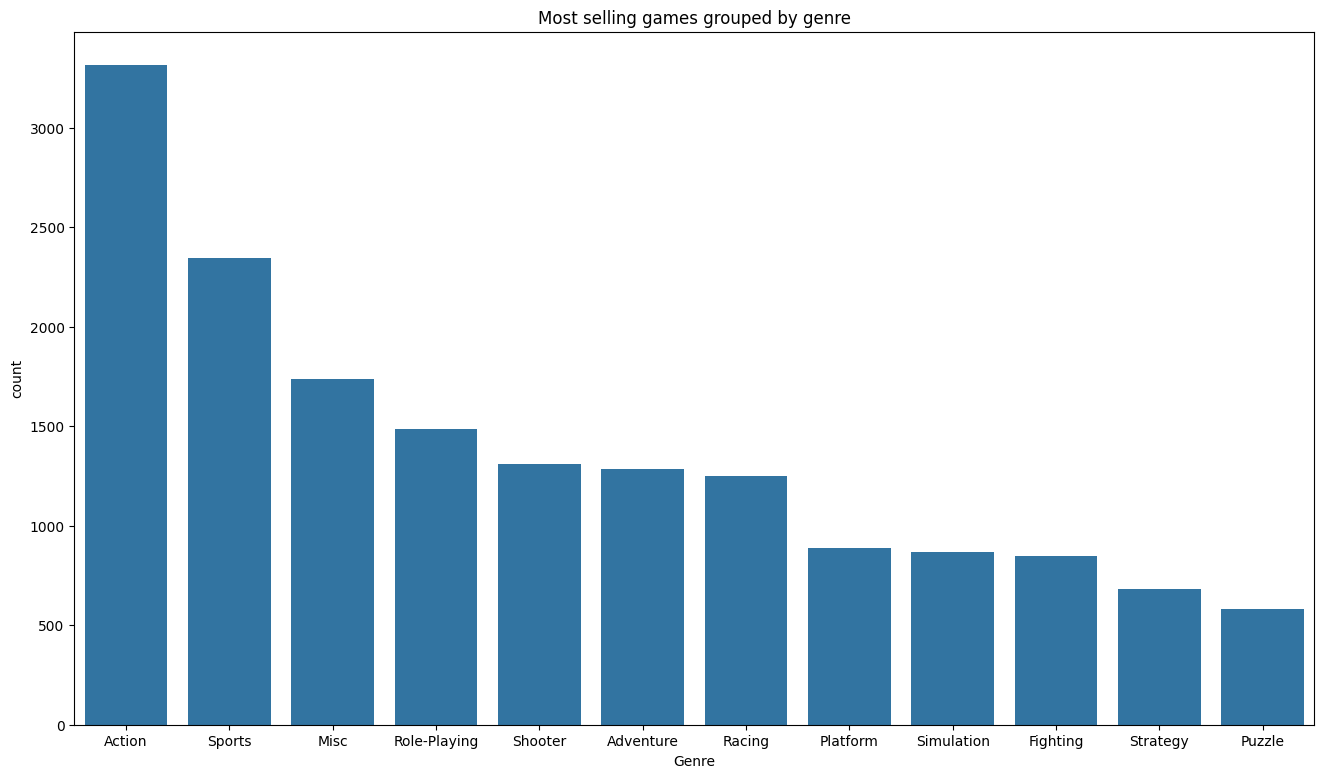

In [ ]:
plt.figure(figsize=(16,9))                                               #Displaying via a graph showing the genre that sold the most number of games
plt.title('Most selling games grouped by genre')
sns.countplot(data=df_sales, x = 'Genre', order = df_sales['Genre'].value_counts().index)

In [ ]:
plt.figure(figsize=(16,9))                                               #Displaying via a graph showing the platform that sold the most number of games
plt.title('Most selling games grouped by platform')
sns.countplot(data=df_sales, x = 'Platform', order = df_sales['Platform'].value_counts().index)

Analyzing sales of games by publisher or regions

In [ ]:
sorted_df = df_sales.groupby(["Name","Publisher"])["Global_Sales"].max().reset_index().sort_values(ascending = False,by = "Global_Sales").head(10)                 #Top 10 most selling games worldwide
sorted_df

In [ ]:
sorted_df = df_sales.groupby(["Name","Publisher"])["EU_Sales"].max().reset_index().sort_values(ascending = False,by = "EU_Sales").head(10)                 #Top 10 most selling games across Europe
sorted_df

In [ ]:
sorted_df = df_sales.groupby(["Name","Publisher"])["NA_Sales"].max().reset_index().sort_values(ascending = False,by = "NA_Sales").head(10)                 #Top 10 most selling games across North America
sorted_df

In [ ]:
sorted_df = df_sales.groupby(["Name","Publisher"])["JP_Sales"].max().reset_index().sort_values(ascending = False,by = "JP_Sales").head(10)                 #Top 10 most selling games across Japan
sorted_df

In [ ]:
sorted_df = df_sales.groupby(["Name","Publisher"])["Other_Sales"].max().reset_index().sort_values(ascending = False,by = "Other_Sales").head(10)                 #Top 10 most selling games across other parts of the world (not NA,EU,JP)
sorted_df

In [ ]:
df_sales["Publisher"].value_counts()       #Displaying the number of games released by each publishers

In [ ]:
platform_count = df_sales["Platform"].value_counts()          #Displaying the number of games a platform has sold
print(platform_count)

To check the highest number of game releases per year and also their distrbution from 2002 to 2011

In [ ]:
year_count = df_sales["Year"].value_counts().head(10)             #Highest number of game releases per year
print(year_count)

In [ ]:
plt.pie(year_count,labels=year_count.index,autopct="%1.1f%%",startangle=90)      #Distribution of games from 2002 to 2011 shown in a pie chart
plt.title("Distribution of games")
plt.show()

In [ ]:
df_sales["Genre"].value_counts()             #Games grouped genre wise

In [ ]:
df_sales.groupby("Genre")["Global_Sales"].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [ ]:
#Correlation b/w the publishers, genres and global sales of various games

corr_df = df_sales.drop(["Genre","Publisher","Global_Sales"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df,annot = True,fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidth = 1, linecolor ="Black")
heatmap.set_title("Correlation b/w the publishers, genres and global sales of various games")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

# Analyzing the global sales of games yearwise, platform wise, sales in regions by platforms.

In [ ]:
year_sales = df_sales.groupby("Year")["Global_Sales"].sum().reset_index().sort_values(ascending = False,by = "Global_Sales")                #Global sales for all games per year
print(year_sales)

In [ ]:
platform_sales = df_sales.groupby("Platform")["Global_Sales"].sum().reset_index().sort_values(ascending = False,by = "Global_Sales")    #Which platform sold the most games globally
print(platform_sales)

   Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
18      PS4        278.10
13       PC        258.82
29       XB        258.26
5        GB        255.45
11      NES        251.07
2       3DS        247.46
10      N64        218.88
23     SNES        200.05
7        GC        199.36
30     XOne        141.06
0      2600         97.08
27     WiiU         81.86
20      PSV         61.93
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03


In [ ]:
platform_sales = df_sales.groupby("Platform")["NA_Sales"].sum().reset_index().sort_values(ascending = False,by = "NA_Sales")    #Which platform sold the most games in North America
print(platform_sales)

   Platform  NA_Sales
28     X360    601.05
16      PS2    583.84
26      Wii    507.71
17      PS3    392.26
4        DS    390.71
15       PS    336.51
6       GBA    187.54
29       XB    186.69
10      N64    139.02
7        GC    133.46
11      NES    125.94
5        GB    114.32
19      PSP    108.99
18      PS4     96.80
13       PC     93.28
0      2600     90.60
30     XOne     83.19
2       3DS     78.87
23     SNES     61.23
27     WiiU     38.32
8       GEN     19.27
20      PSV     16.20
3        DC      5.43
22      SCD      1.00
21      SAT      0.72
1       3DO      0.00
14     PCFX      0.00
12       NG      0.00
9        GG      0.00
24     TG16      0.00
25       WS      0.00


In [ ]:
platform_sales = df_sales.groupby("Platform")["EU_Sales"].sum().reset_index().sort_values(ascending = False,by = "EU_Sales")    #Which platform sold the most games in Europe
print(platform_sales)

   Platform  EU_Sales
17      PS3    343.71
16      PS2    339.29
28     X360    280.58
26      Wii    268.38
15       PS    213.60
4        DS    194.65
13       PC    139.68
18      PS4    123.70
6       GBA     75.25
19      PSP     68.25
29       XB     60.95
2       3DS     58.52
5        GB     47.82
30     XOne     45.65
10      N64     41.06
7        GC     38.71
27     WiiU     24.23
11      NES     21.15
23     SNES     19.04
20      PSV     16.33
8       GEN      5.52
0      2600      5.47
3        DC      1.69
21      SAT      0.54
22      SCD      0.36
25       WS      0.00
24     TG16      0.00
1       3DO      0.00
9        GG      0.00
12       NG      0.00
14     PCFX      0.00


In [ ]:
platform_sales = df_sales.groupby("Platform")["JP_Sales"].sum().reset_index().sort_values(ascending = False,by = "JP_Sales")    #Which platform sold the most games in Japan
print(platform_sales)

In [ ]:
platform_sales = df_sales.groupby("Platform")["Other_Sales"].sum().reset_index().sort_values(ascending = False,by = "Other_Sales")    #Which platform sold the most games in other part of the world
print(platform_sales)

In [ ]:
year_sales = df_sales.groupby(["Genre","Year"])["Global_Sales"].sum().reset_index().sort_values(ascending = False,by = "Global_Sales")        #Which genres did well in a year
print(year_sales)

            Genre    Year  Global_Sales
29         Action  2009.0        139.36
355        Sports  2009.0        138.52
28         Action  2008.0        136.39
352        Sports  2006.0        136.16
33         Action  2013.0        125.22
..            ...     ...           ...
42      Adventure  1993.0          0.07
258  Role-Playing  2017.0          0.04
296    Simulation  1985.0          0.03
297    Simulation  1988.0          0.03
37         Action  2017.0          0.01

[389 rows x 3 columns]


In [ ]:
year_sales = df_sales.groupby(["Genre","Platform"])["Global_Sales"].sum().reset_index().sort_values(ascending = False,by = "Global_Sales")        #Which genres did well in a platform
print(year_sales)

          Genre Platform  Global_Sales
13       Action      PS3        307.88
265      Sports      Wii        292.06
219     Shooter     X360        278.55
258      Sports      PS2        273.41
12       Action      PS2        272.76
..          ...      ...           ...
137      Puzzle      PS4          0.02
255      Sports       NG          0.02
125      Puzzle      3DO          0.02
216     Shooter     TG16          0.02
223  Simulation      3DO          0.02

[293 rows x 3 columns]


Checking if any relationship between the sales of games and the platforms for which they are released.

<ipython-input-60-c29e040b31ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_sales.drop(["Platform","Global_Sales"],axis=1).corr(method="pearson")


[Text(0.5, 0, 'Rank'),
 Text(1.5, 0, 'Year'),
 Text(2.5, 0, 'NA_Sales'),
 Text(3.5, 0, 'EU_Sales'),
 Text(4.5, 0, 'JP_Sales'),
 Text(5.5, 0, 'Other_Sales')]

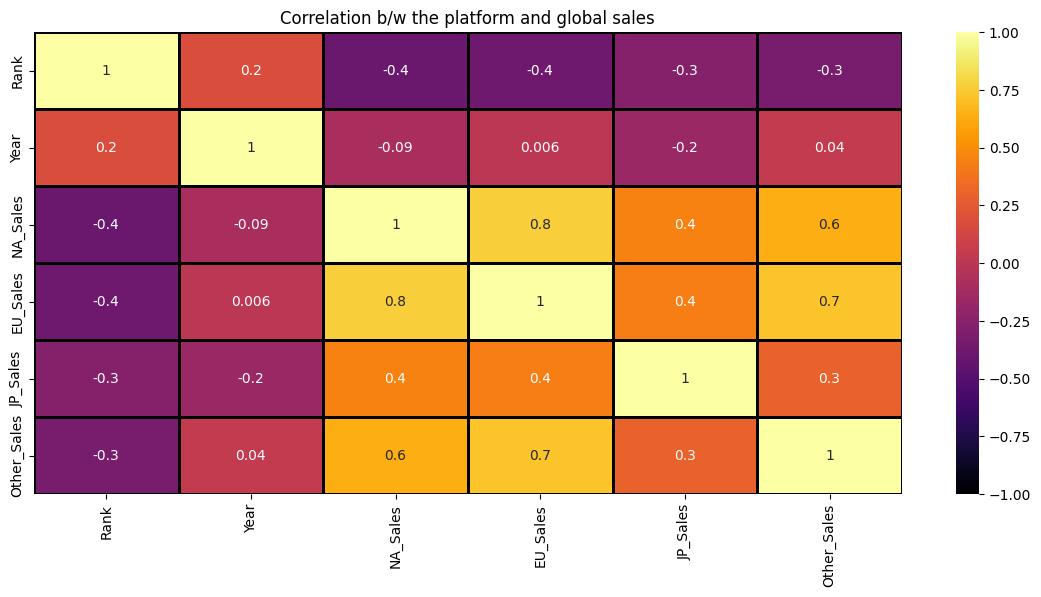

In [ ]:
#Correlation b/w the platform and global sales

corr_df = df_sales.drop(["Platform","Global_Sales"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df,annot = True,fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidth = 1, linecolor ="Black")
heatmap.set_title("Correlation b/w the platform and global sales")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

In [ ]:
max_sales_index = df_sales.groupby('Platform')['Global_Sales'].idxmax()                        #Displaying which publisher sold the most games for each platform

# Selecting the rows with the maximum sales for each platform
top_publishers = df_sales.loc[max_sales_index, ['Platform','Publisher', 'Global_Sales']]

print(top_publishers)

      Platform                           Publisher  Global_Sales
89        2600                               Atari          7.81
12635      3DO        Konami Digital Entertainment          0.06
32         3DS                            Nintendo         14.35
637         DC                                Sega          2.42
6           DS                            Nintendo         30.01
4           GB                            Nintendo         31.37
25         GBA                            Nintendo         15.85
107         GC                            Nintendo          7.07
143        GEN                                Sega          6.03
13525       GG                                Sega          0.04
46         N64                            Nintendo         11.89
1          NES                            Nintendo         40.24
6681        NG                                 SNK          0.25
83          PC                     Electronic Arts          8.11
14556     PCFX           

In [ ]:
publisher_sales = df_sales.groupby('Publisher')['Global_Sales'].sum()                    #To show which publisher sold the best selling game

# Finding the publisher with the highest total global sales
top_publisher = publisher_sales.idxmax()
total_sales = publisher_sales.max()

# Printing the result
print(f"The publisher with the highest total global sales is '{top_publisher}'")

The publisher with the highest total global sales is 'Nintendo'


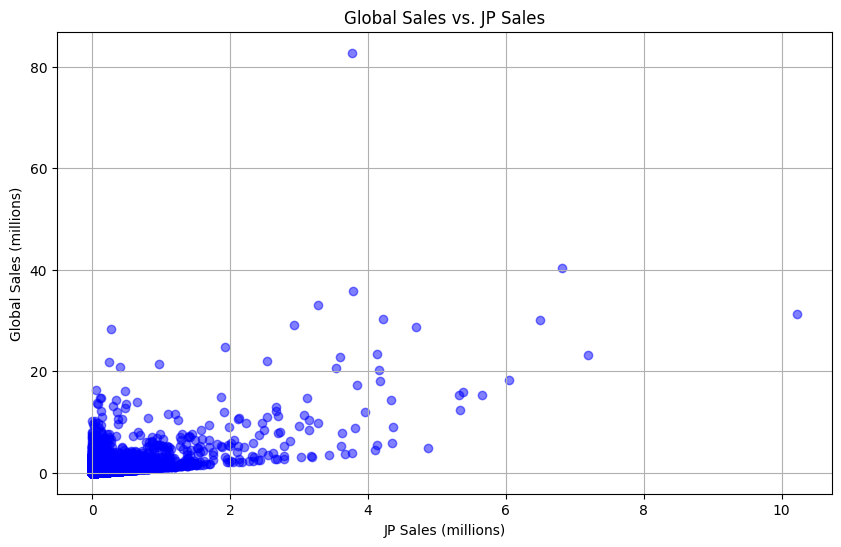

In [ ]:
global_sales = df_sales['Global_Sales']                   #Scatterplot to view the relation b/w global sales and Japan Sales
JP_sales = df_sales['JP_Sales']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(JP_sales, global_sales, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Global Sales vs. JP Sales')
plt.xlabel('JP Sales (millions)')
plt.ylabel('Global Sales (millions)')

# Displaying the plot
plt.grid(True)
plt.show()

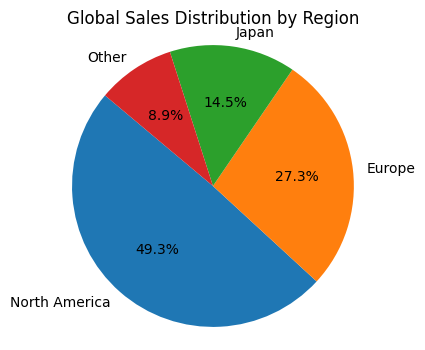

In [ ]:
na_sales_total = df_sales['NA_Sales'].sum()                    #Distribution of sales across the world shown in a pie chart
eu_sales_total = df_sales['EU_Sales'].sum()
jp_sales_total = df_sales['JP_Sales'].sum()
other_sales_total = df_sales['Other_Sales'].sum()

# Create a list of sales totals and corresponding labels
total_sales = [na_sales_total, eu_sales_total, jp_sales_total, other_sales_total]
labels = ['North America', 'Europe', 'Japan', 'Other']

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(total_sales, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Global Sales Distribution by Region')
plt.axis('equal')
plt.show()